In [1]:
import pandas as pd

df = pd.read_csv("mxmh_survey_results.csv")

In [2]:
# 年齡18-22以外刪除
df = df[(df.Age < 23) & (df.Age > 17)]

In [3]:
# 移除缺失值
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 2 to 734
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     235 non-null    object 
 1   Age                           235 non-null    float64
 2   Primary streaming service     235 non-null    object 
 3   Hours per day                 235 non-null    float64
 4   While working                 235 non-null    object 
 5   Instrumentalist               235 non-null    object 
 6   Composer                      235 non-null    object 
 7   Fav genre                     235 non-null    object 
 8   Exploratory                   235 non-null    object 
 9   Foreign languages             235 non-null    object 
 10  BPM                           235 non-null    float64
 11  Frequency [Classical]         235 non-null    object 
 12  Frequency [Country]           235 non-null    object 
 13  Frequency 

In [4]:
from matplotlib import rc

# 列出可用的字體
# for font in font_manager.fontManager.ttflist:
#     print(font.name)

#設定中文字體
rc('font', family='Microsoft YaHei')

# 設定 Music effects 的順序
df['Music effects'] = pd.Categorical(df['Music effects'], categories=['Improve', 'No effect', 'Worsen'], ordered=True)

# color
palette = {
    'Improve': 'indianred',
    'No effect': 'gold',
    'Worsen': 'darkblue'
}

## 音樂效果

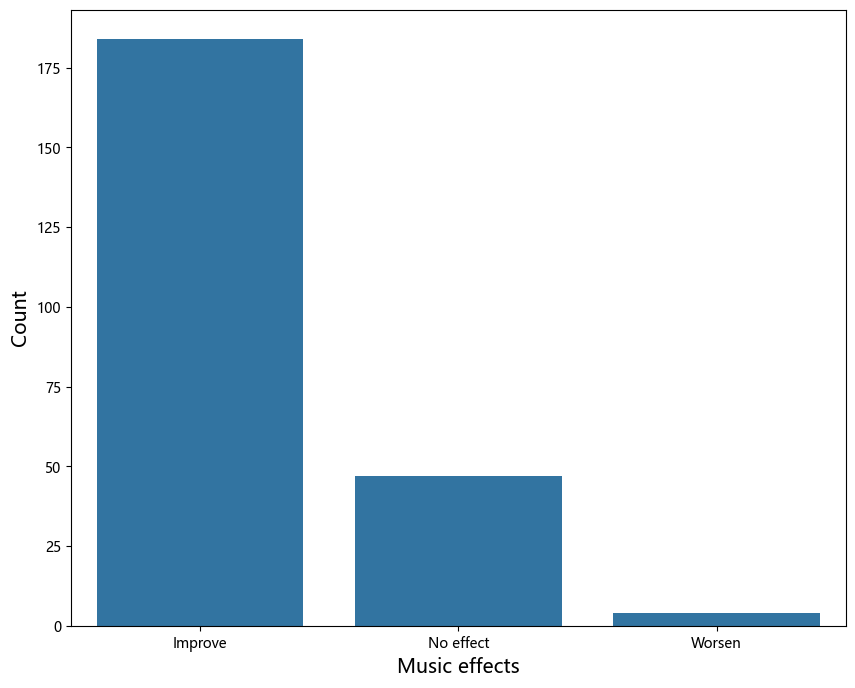

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='Music effects')

plt.xlabel('Music effects', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

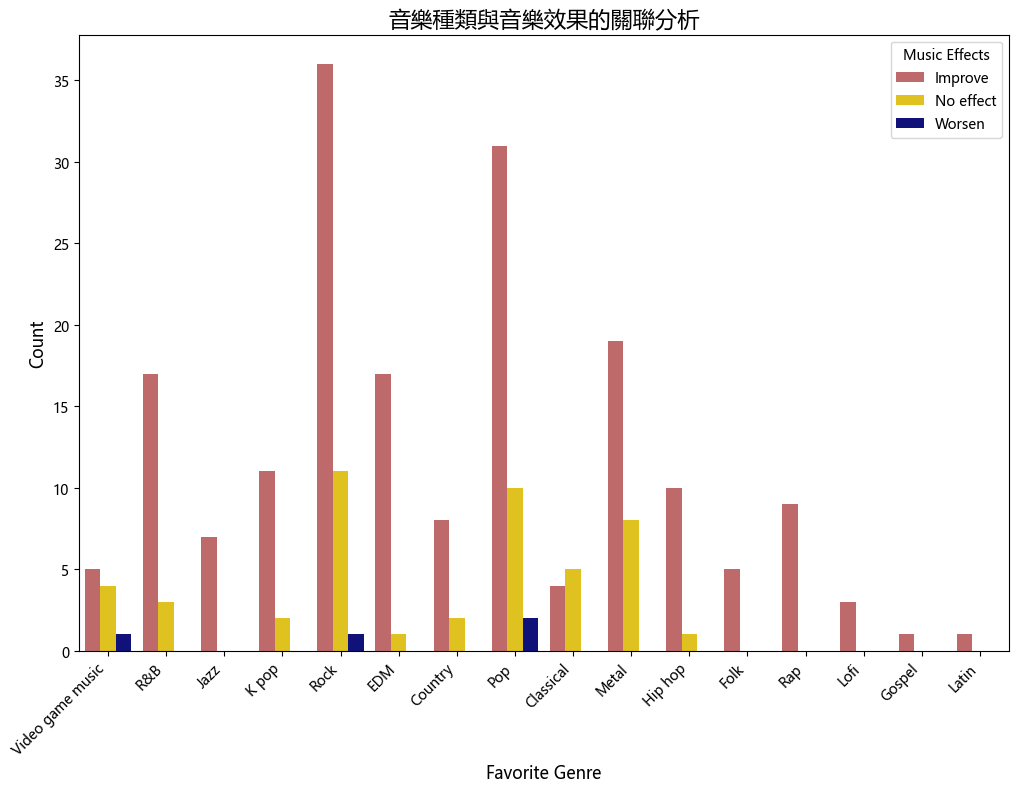

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='Fav genre', hue='Music effects', palette=palette)

plt.title('音樂種類與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Favorite Genre')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Favorite Genre', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

plt.legend(title='Music Effects')
plt.show()


C:\Users\abc35\AppData\Local\Temp\ipykernel_17156\4177102891.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot['count'] = df_plot.groupby(['Fav genre', 'Music effects'])['Music effects'].transform('count')


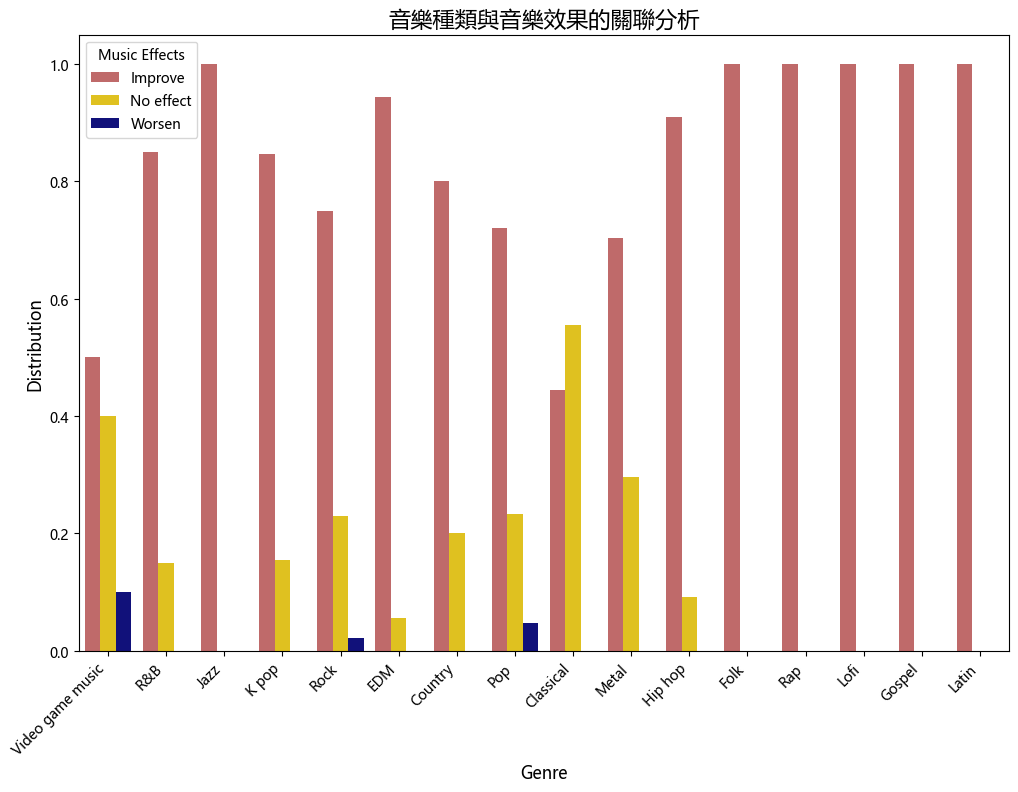

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot=df
df_plot['count'] = df_plot.groupby(['Fav genre', 'Music effects'])['Music effects'].transform('count')
df_plot['total'] = df_plot.groupby('Fav genre')['Fav genre'].transform('count')
df_plot['probability'] = df_plot['count'] / df_plot['total']

df_plot = df_plot.drop_duplicates(subset=['Fav genre', 'Music effects'])

plt.figure(figsize=(12, 8))

sns.barplot(data=df_plot, x='Fav genre', y='probability', hue='Music effects', palette=palette)

plt.title('音樂種類與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Genre', fontsize=12, color='black')
plt.ylabel('Distribution', fontsize=12, color='black')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title='Music Effects')
plt.show()


In [8]:
# outlier deletion
df_bpm = df[(df.BPM < 500) & (df.BPM > 20)]
print(df_bpm['BPM'].max())
print(df_bpm['BPM'].min())

220.0
52.0


C:\Users\abc35\AppData\Local\Temp\ipykernel_17156\2587305362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bpm, x='Music effects', y='BPM', palette=palette)


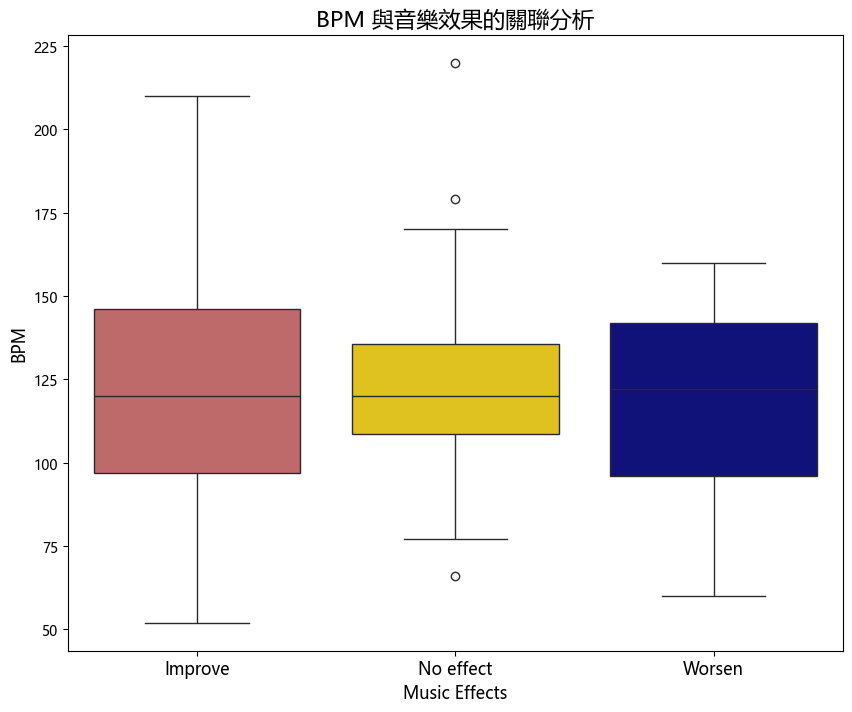

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.boxplot(data=df_bpm, x='Music effects', y='BPM', palette=palette)

plt.title('BPM 與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Music Effects', fontsize=12, color='black')
plt.ylabel('BPM', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

plt.show()


In [10]:
filtered_df = df[df['Hours per day'] > 16]
print(filtered_df)

               Timestamp   Age Primary streaming service  Hours per day  \
726  10/23/2022 20:50:27  18.0               Apple Music           18.0   

    While working Instrumentalist Composer Fav genre Exploratory  \
726           Yes              No       No       EDM         Yes   

    Foreign languages  ...  Frequency [Rock] Frequency [Video game music]  \
726                No  ...         Sometimes                    Sometimes   

    Anxiety Depression Insomnia   OCD Music effects count total probability  
726     9.0        8.0      5.0  10.0       Improve    17    18    0.944444  

[1 rows x 35 columns]


C:\Users\abc35\AppData\Local\Temp\ipykernel_17156\2036177568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Music effects', y='Hours per day', palette=palette)


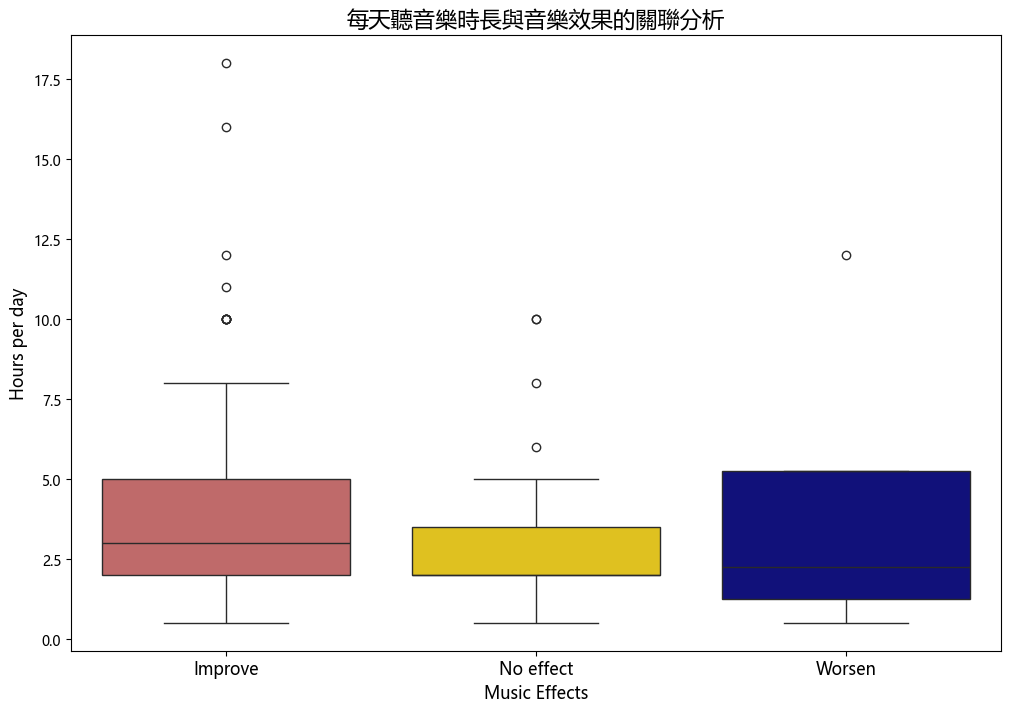

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.boxplot(data=df, x='Music effects', y='Hours per day', palette=palette)

plt.title('每天聽音樂時長與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Music Effects', fontsize=12, color='black')
plt.ylabel('Hours per day', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

plt.show()


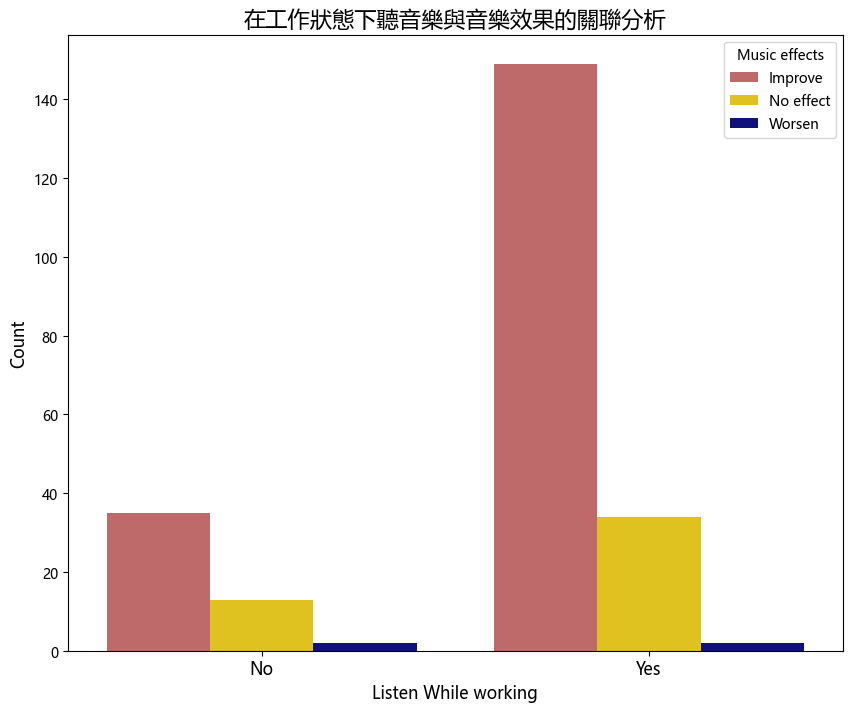

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.countplot(data=df, x='While working', hue='Music effects', palette=palette)

plt.title('在工作狀態下聽音樂與音樂效果的關聯分析', fontsize=16)
plt.xlabel('Listen While working', fontsize=12, color='black')
plt.ylabel('Count', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

plt.legend(title='Music effects')

plt.show()

In [13]:
import scipy.stats as stats

# 創建列聯表
contingency_table = pd.crosstab(df['While working'], df['Music effects'])

# 執行卡方檢驗
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)


Chi-squared: 3.6720475910693304
P-value: 0.15945017379922427
Degrees of freedom: 2
Expected frequencies:
[[ 39.14893617  10.           0.85106383]
 [144.85106383  37.           3.14893617]]


***P-value (0.159) 大於常用的顯著性水平（如 0.05 或 0.01），因此我們無法拒絕原假設。這意味著我們沒有足夠的證據表明在工作狀態下聽音樂與音樂效果之間存在顯著關聯。

Chi-squared 值 (3.67) 並不是非常高，這也表明觀察到的數據與期望數據之間的差異並不大。**

## 失調or疾病

Anxiety（焦慮）  
Depression（抑鬱）  
Insomnia（失眠）  
OCD（強迫症）  　

C:\Users\abc35\AppData\Local\Temp\ipykernel_17156\482557775.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Anxiety'], color='blue', label='Anxiety', shade=True)
C:\Users\abc35\AppData\Local\Temp\ipykernel_17156\482557775.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Depression'], color='green', label='Depression', shade=True)
C:\Users\abc35\AppData\Local\Temp\ipykernel_17156\482557775.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['Insomnia'], color='red', label='Insomnia', shade=True)
C:\Users\abc35\AppData\Local\Temp\ipykernel_17156\482557775.py:9: FutureWarning: 

`shade` is n

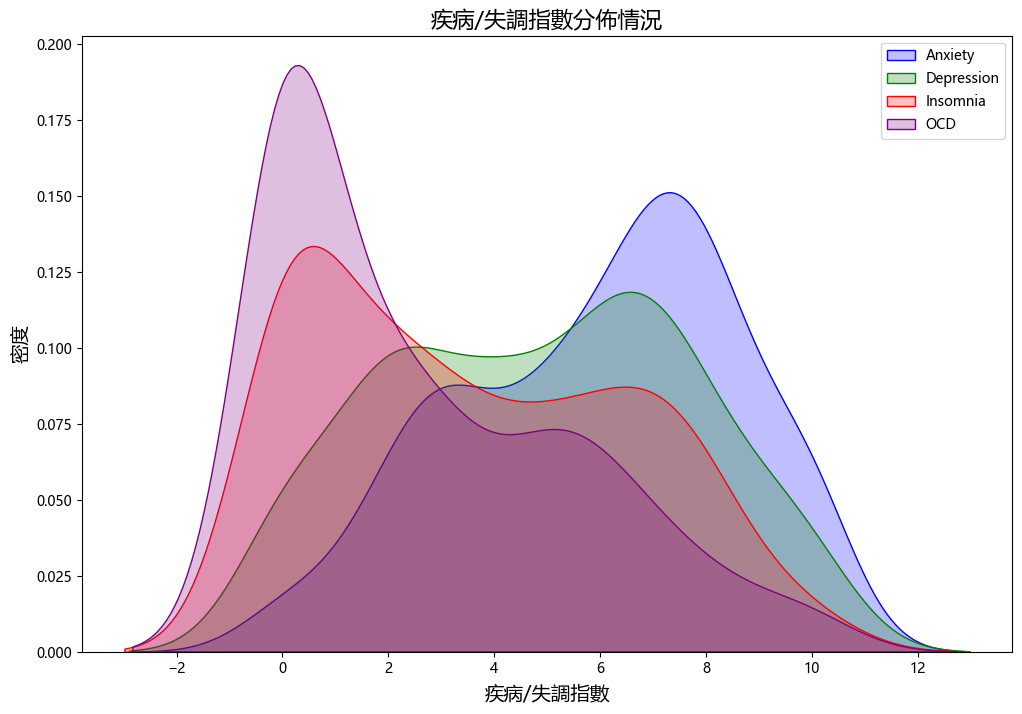

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.kdeplot(data=df['Anxiety'], color='blue', label='Anxiety', shade=True)
sns.kdeplot(data=df['Depression'], color='green', label='Depression', shade=True)
sns.kdeplot(data=df['Insomnia'], color='red', label='Insomnia', shade=True)
sns.kdeplot(data=df['OCD'], color='purple', label='OCD', shade=True)

plt.title('疾病/失調指數分佈情況', fontsize=16)
plt.xlabel('疾病/失調指數', fontsize=14)
plt.ylabel('密度', fontsize=14)

plt.legend()
plt.show()

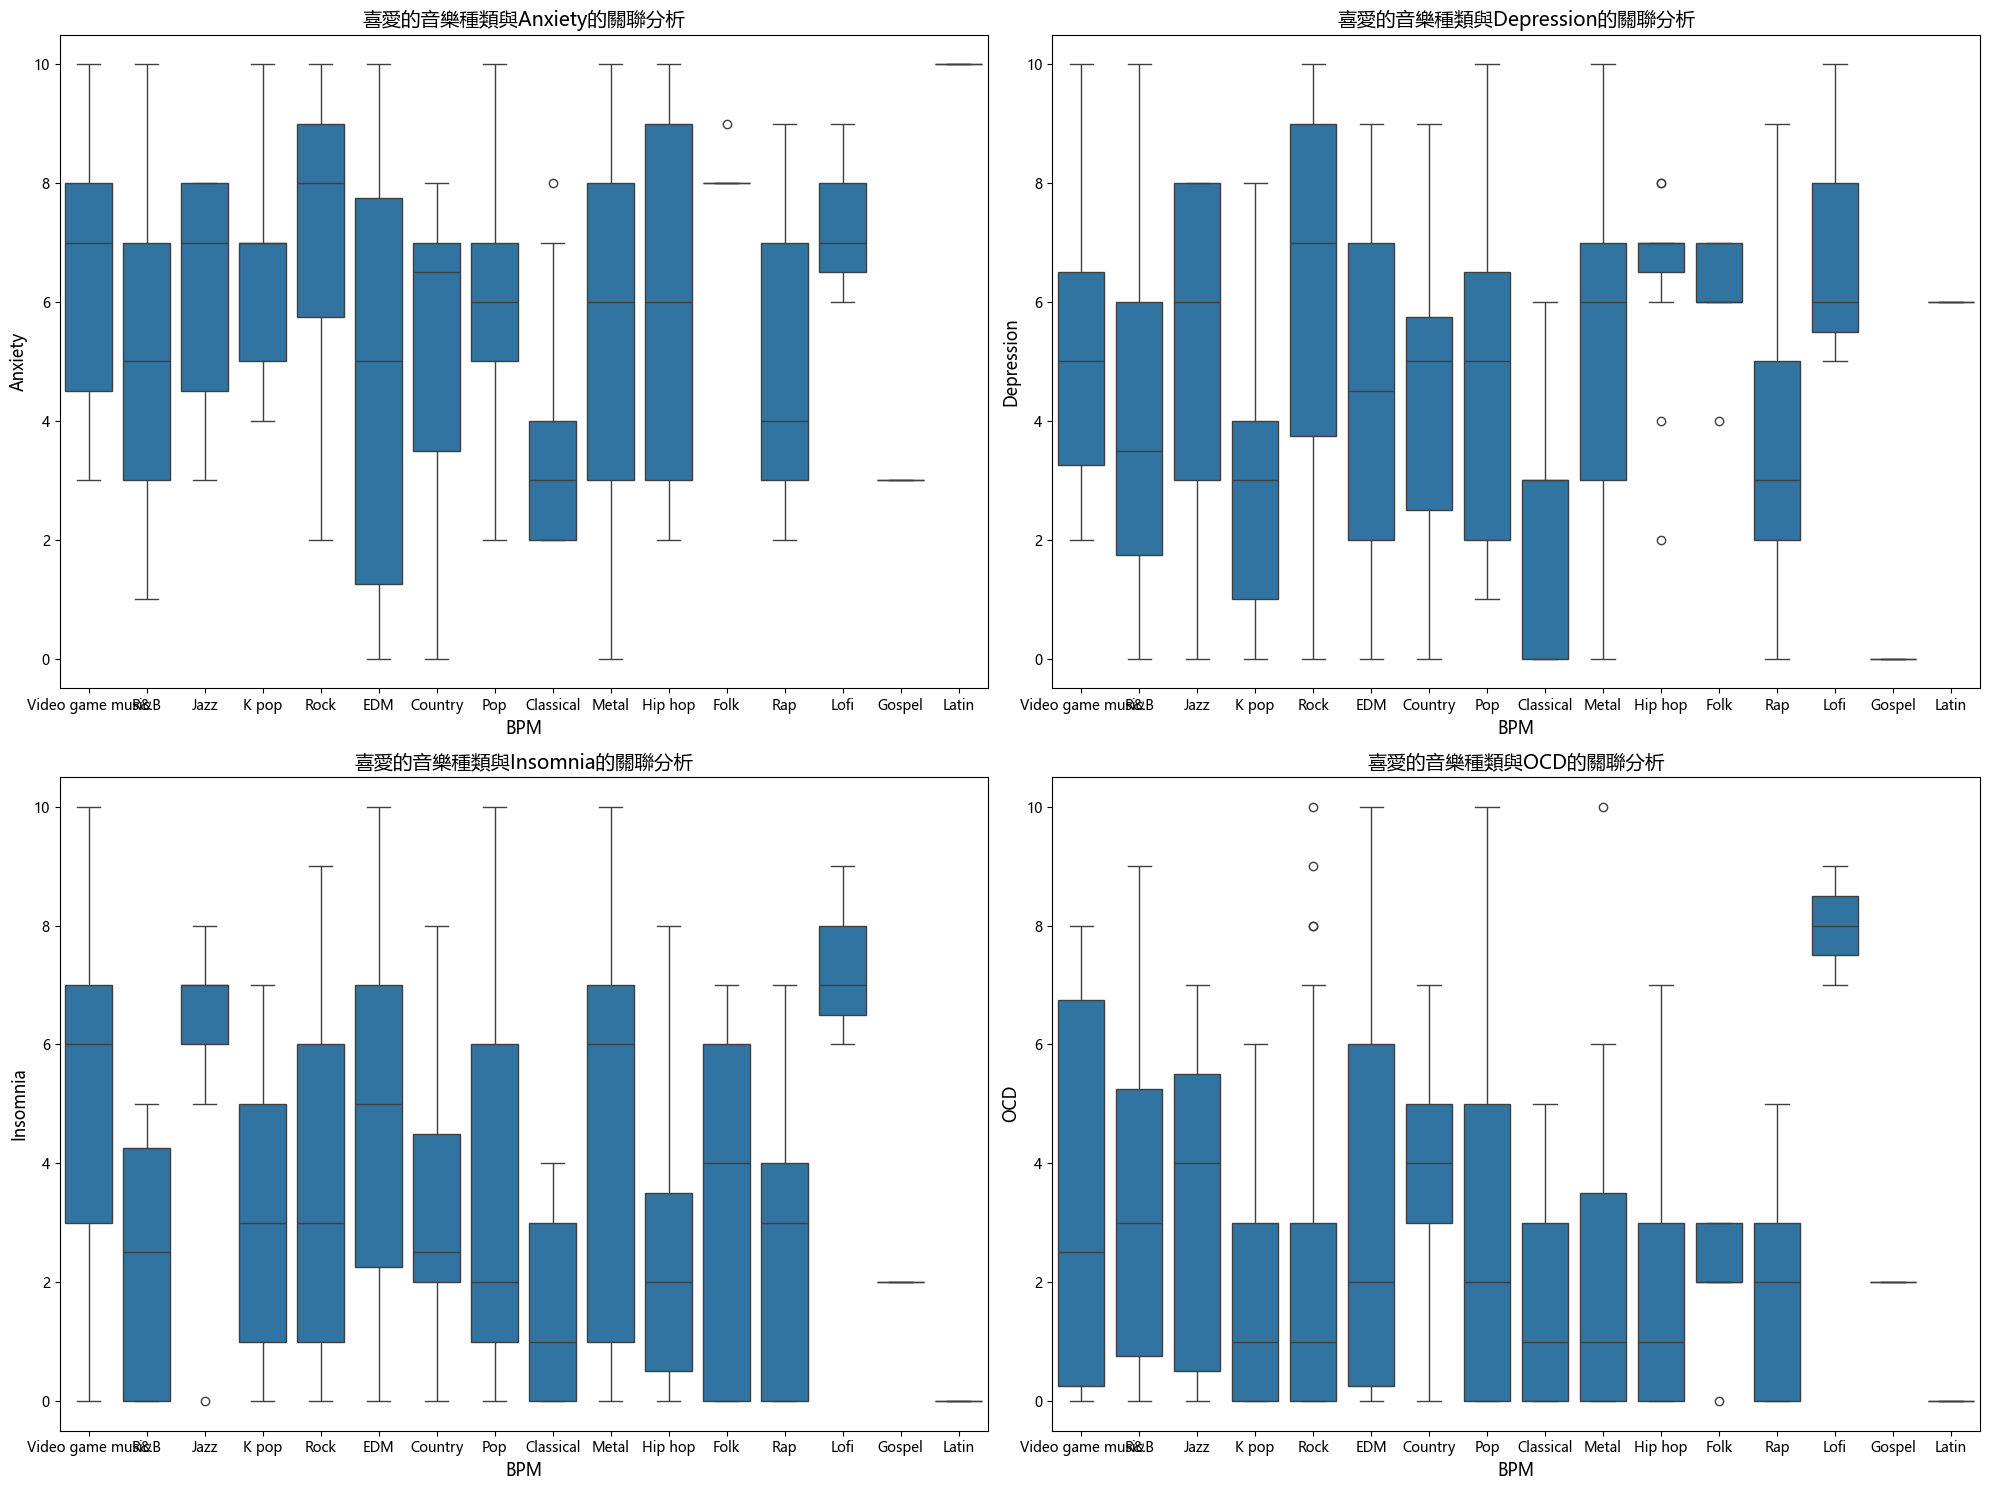

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i, disease in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Fav genre', y=disease, data=df)
    plt.title(f'喜愛的音樂種類與{disease}的關聯分析', fontsize=14)
    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(disease, fontsize=12)

plt.tight_layout()
plt.show()

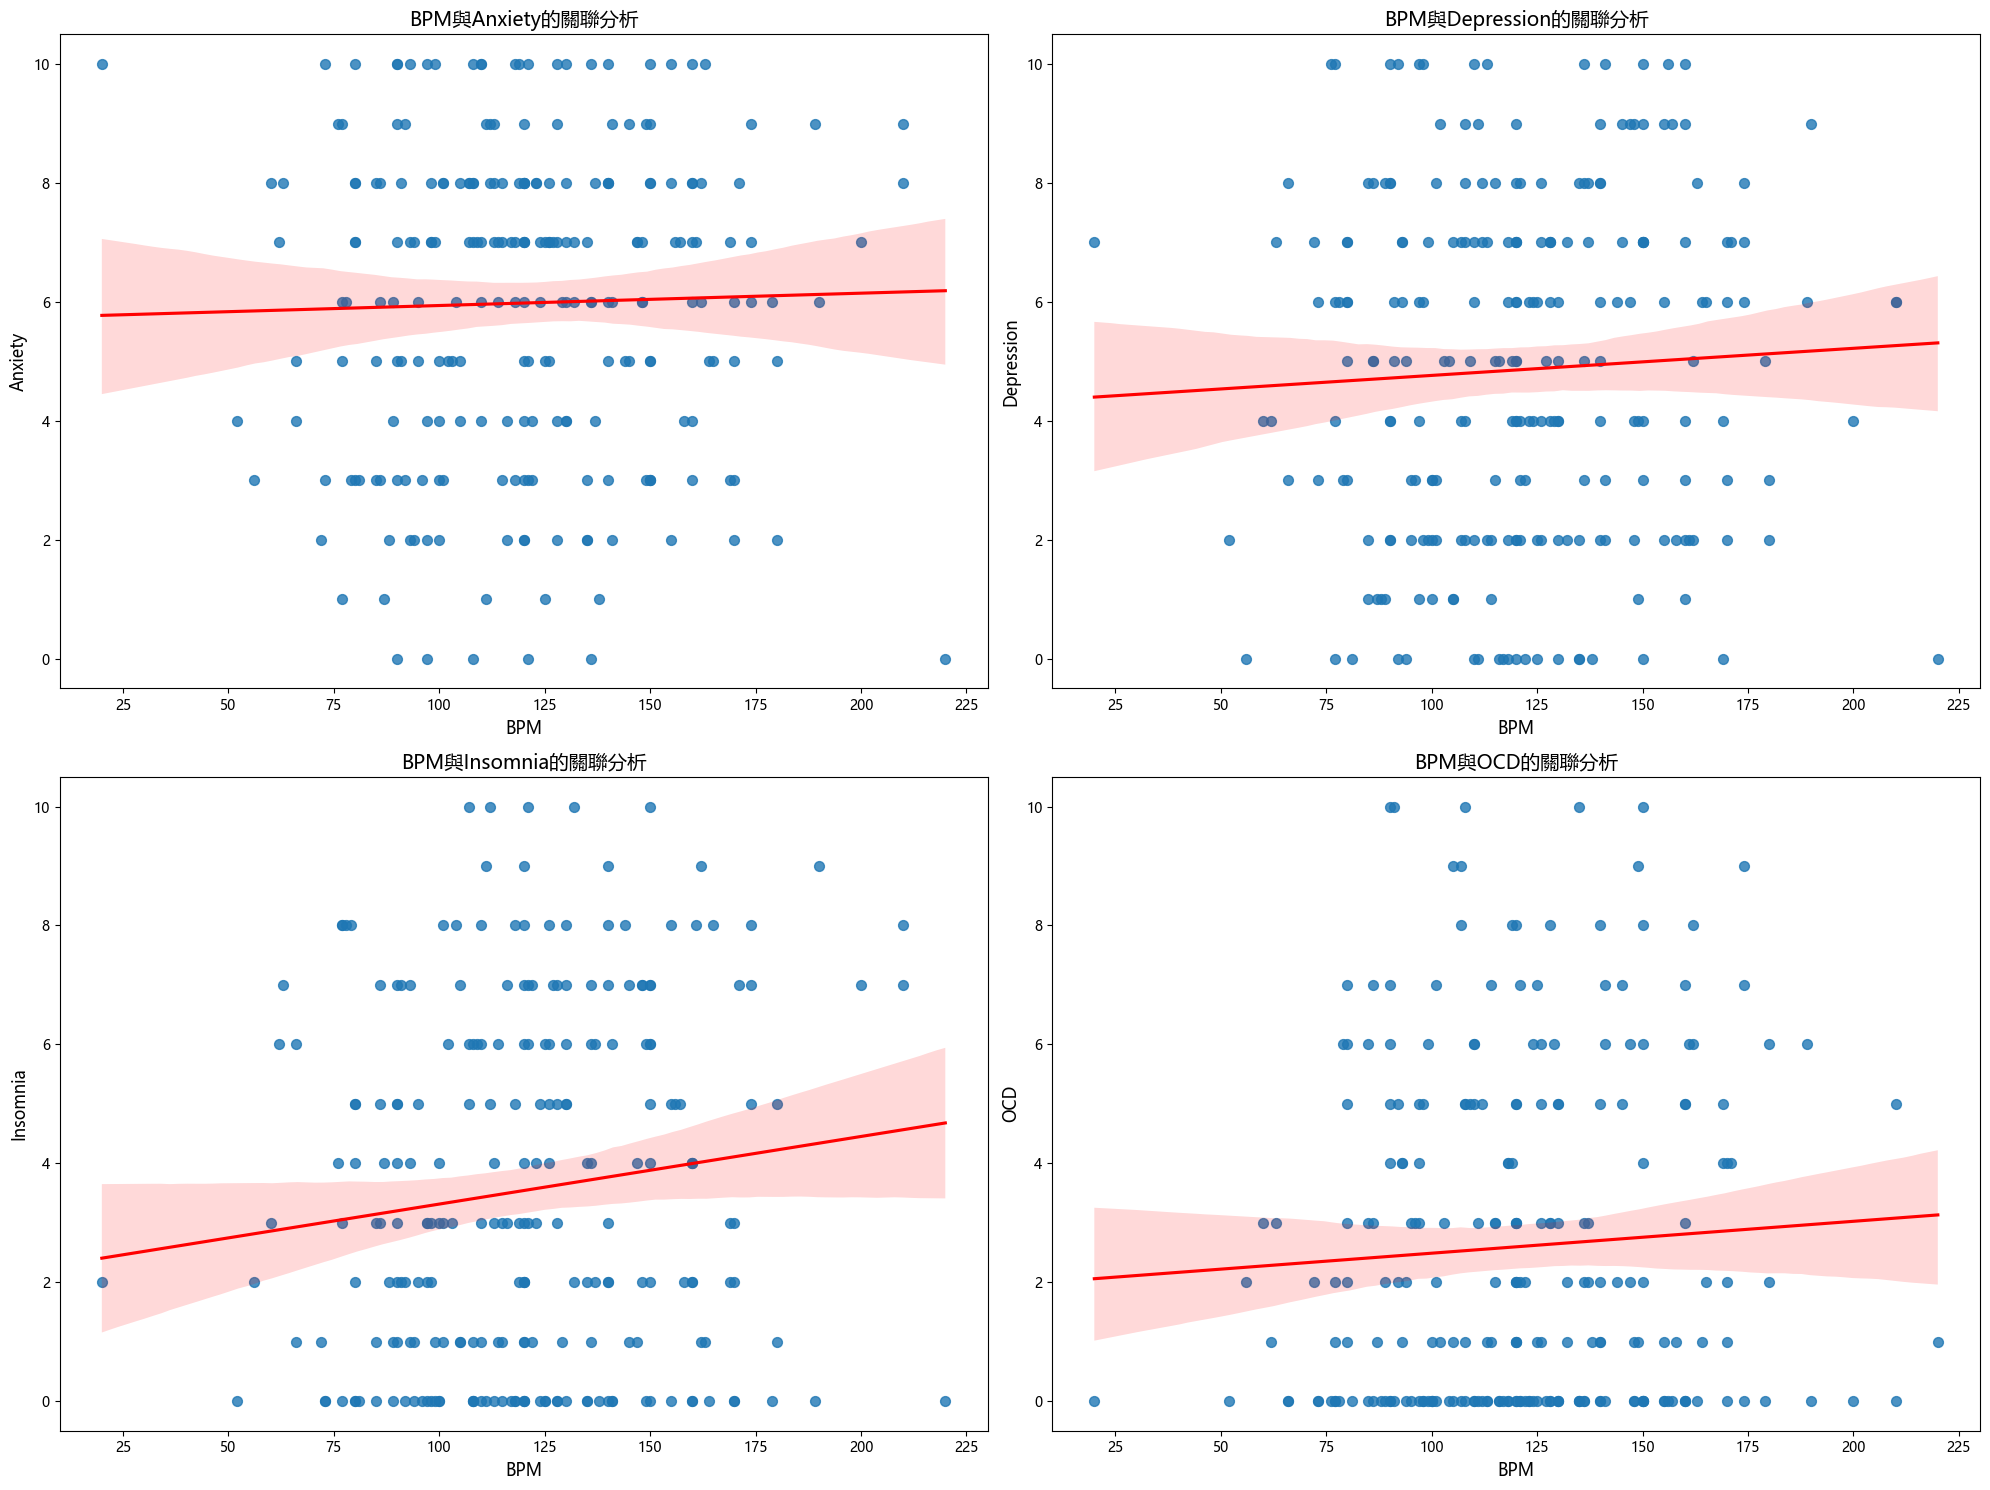

Anxiety       0.025093
Depression    0.050220
Insomnia      0.121654
OCD           0.060433
Name: BPM, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i, disease in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD'], 1):
    plt.subplot(2, 2, i)
    sns.regplot(x='BPM', y=disease, data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'BPM與{disease}的關聯分析', fontsize=14)
    plt.xlabel('BPM', fontsize=12)
    plt.ylabel(disease, fontsize=12)

plt.tight_layout()
plt.show()

corr_matrix = df[['BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()

print(corr_matrix['BPM'][1:])

**這些相關係數都接近於 0，表示 BPM 與這些疾病指數之間的線性關係較弱。因此，根據結果，我們無法得出顯著的結論表明 BPM 與這些特定疾病之間存在明顯的相關性。**

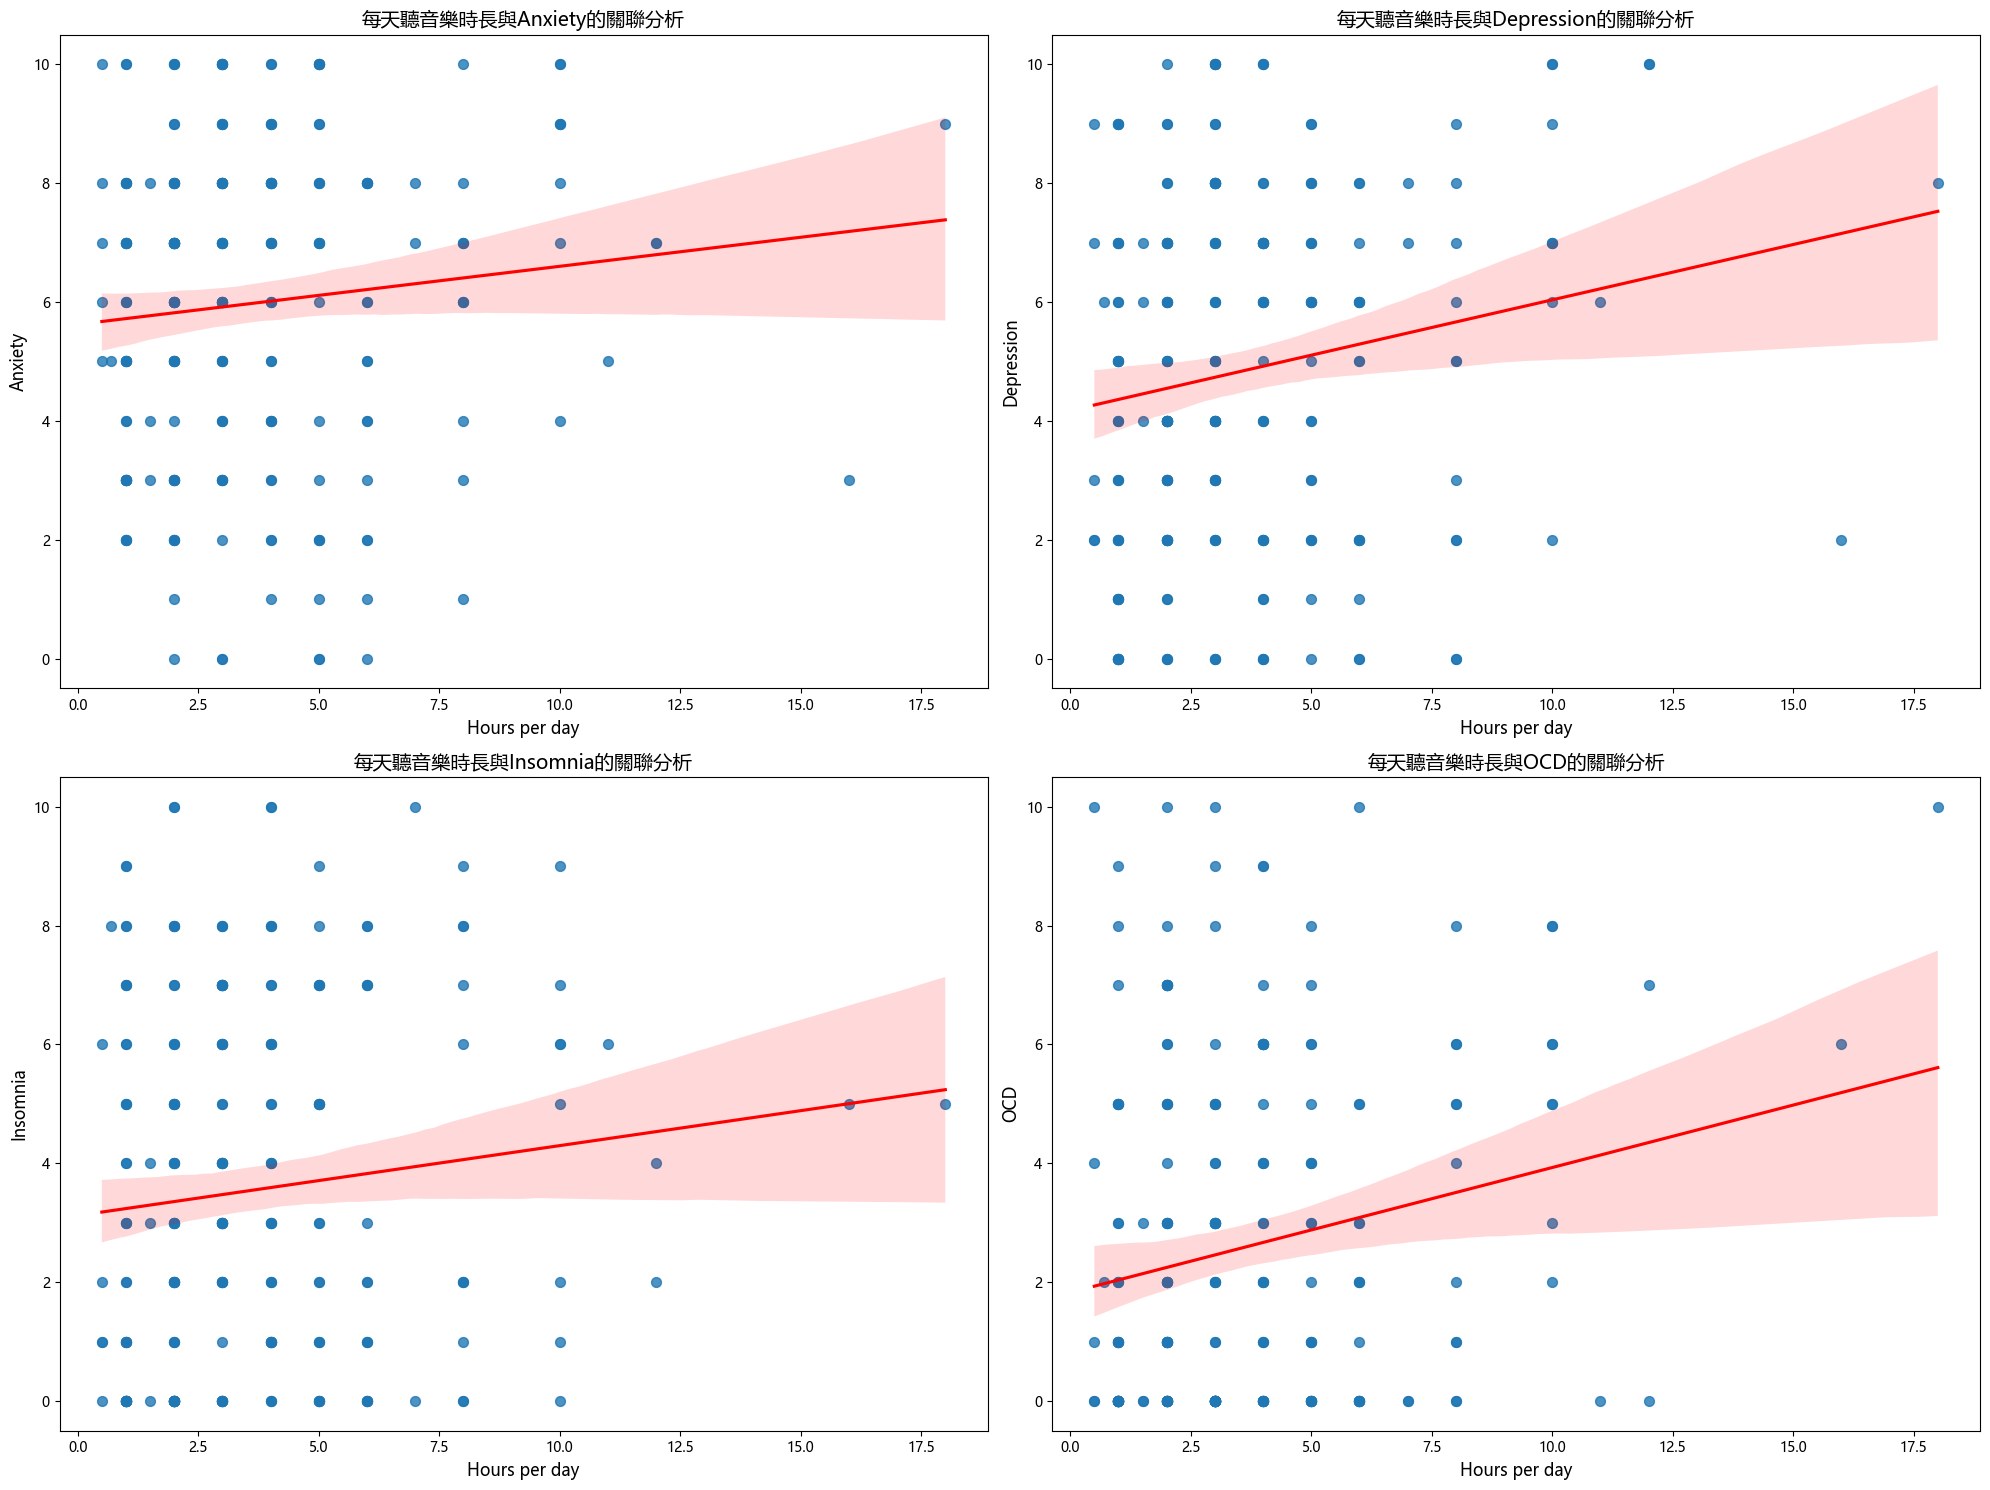

Anxiety       0.100852
Depression    0.175003
Insomnia      0.107375
OCD           0.201934
Name: Hours per day, dtype: float64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

for i, disease in enumerate(['Anxiety', 'Depression', 'Insomnia', 'OCD'], 1):
    plt.subplot(2, 2, i)
    sns.regplot(x='Hours per day', y=disease, data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'每天聽音樂時長與{disease}的關聯分析', fontsize=14)
    plt.xlabel('Hours per day', fontsize=12)
    plt.ylabel(disease, fontsize=12)

plt.tight_layout()
plt.show()

corr_matrix = df[['Hours per day', 'Anxiety', 'Depression', 'Insomnia', 'OCD']].corr()

print(corr_matrix['Hours per day'][1:])

**這些相關係數都接近於 0，表示音樂時數與這些疾病指數之間的線性關係較弱。根據結果，我們無法得出顯著的結論表明音樂時數與這些特定疾病之間存在明顯的相關性。**